## Ranking stars by their similarity using cosine similarity

In [3]:

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load dataset
file_path = "Resources/part-00000-3d57ee90-8dc9-4f89-97e6-768aa0ffce3c-c000.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

In [5]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
excluded_columns = ["Default_Flag", "Num_Stars", "Num_Planets", "Controversial_Flag"]
features = df[numerical_columns].drop(columns=excluded_columns, errors="ignore")

In [6]:
# Check for missing data

print("Initial shape:", features.shape)
print("Missing values per column:\n", features.isna().sum())

features = features.drop(columns=['Release_Date'], errors='ignore')
features_filled = features.fillna(features.mean())

print("New shape after dropping empty columns:", features_filled.shape)
print("Missing values after filling:\n", features_filled.isna().sum().sum())

Initial shape: (1130, 74)
Missing values per column:
 Discovery_Year                   0
Orbital_Period_Days              0
Orbital_Period_Error_Upper       0
Orbital_Period_Error_Lower       0
Semi_Major_Axis_AU               0
                              ... 
sy_gaiamagerr2                   0
Release_Date                  1130
Discovery_Method_Index           0
Discovery_Facility_Index         0
Solar_System_Type_Index          0
Length: 74, dtype: int64
New shape after dropping empty columns: (1130, 73)
Missing values after filling:
 0


In [7]:
# Compute cosine similarity
cosine_sim = cosine_similarity(features_filled)

In [8]:
# Convert to DataFrame for readability
similarity_df = pd.DataFrame(cosine_sim, index=df["Planet_Name"], columns=df["Planet_Name"])

In [9]:
def rank_similar_objects(target, top_n=None):
    # Compute similarity scores for the target object
    target_index = target  # Assuming 'target' is the index of the object
    similarities = cosine_sim[target_index]

    # Rank objects based on similarity (excluding self)
    ranked_indices = np.argsort(similarities)[::-1]  # Sort in descending order
    ranked_indices = ranked_indices[ranked_indices != target_index]  # Exclude self

    # Determine how many to return
    if top_n is None or top_n > len(ranked_indices):
        top_n = len(ranked_indices)  # Return all if top_n is None

    # Get the top-ranked objects and their similarity scores
    selected_indices = ranked_indices[:top_n]
    selected_similarities = similarities[selected_indices]

    # Print ranked objects
    print(f"Top {top_n} most similar objects to object {target_index}:")
    for rank, (index, score) in enumerate(zip(selected_indices, selected_similarities), 1):
        print(f"{rank}. Object {index} - Similarity: {score:.4f}")

    return selected_indices, selected_similarities

In [10]:
def plot_similarity_ranking(indices, similarities, target_index):
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(indices)), similarities, tick_label=indices, color='skyblue')
    plt.xlabel("Object Index")
    plt.ylabel("Cosine Similarity")
    plt.title(f"Top {len(indices)} Most Similar Objects to {target_index}")
    plt.xticks(rotation=45)
    plt.show()

Top 1129 most similar objects to object 0:
1. Object 370 - Similarity: 0.9998
2. Object 872 - Similarity: 0.9997
3. Object 657 - Similarity: 0.9997
4. Object 1051 - Similarity: 0.9997
5. Object 923 - Similarity: 0.9997
6. Object 1011 - Similarity: 0.9997
7. Object 1057 - Similarity: 0.9997
8. Object 1018 - Similarity: 0.9997
9. Object 113 - Similarity: 0.9996
10. Object 673 - Similarity: 0.9996
11. Object 540 - Similarity: 0.9996
12. Object 265 - Similarity: 0.9996
13. Object 415 - Similarity: 0.9996
14. Object 932 - Similarity: 0.9995
15. Object 593 - Similarity: 0.9995
16. Object 651 - Similarity: 0.9995
17. Object 1020 - Similarity: 0.9995
18. Object 970 - Similarity: 0.9995
19. Object 1025 - Similarity: 0.9995
20. Object 305 - Similarity: 0.9994
21. Object 143 - Similarity: 0.9994
22. Object 44 - Similarity: 0.9994
23. Object 455 - Similarity: 0.9994
24. Object 1108 - Similarity: 0.9994
25. Object 467 - Similarity: 0.9994
26. Object 517 - Similarity: 0.9994
27. Object 53 - Similari

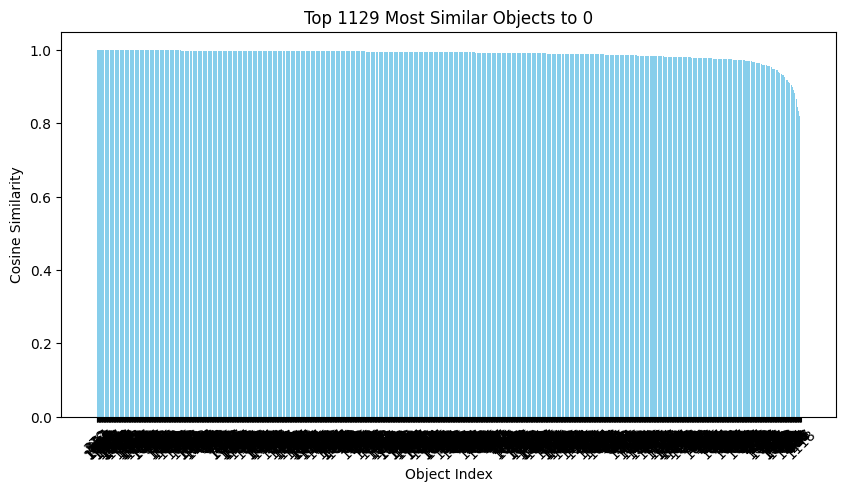

In [12]:
# Example ranking for a random planet
target_object = 0
indices, similarities = rank_similar_objects(target_object)
plot_similarity_ranking(indices, similarities, target_object)


In [29]:
plot_similarity_ranking(ranked_indices)